In [79]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [194]:
df_edges = pd.read_csv("Desktop/Hsin/Data_Analysis/Raw_Data/Tutorial/Network/network_links_sample.csv")
df_edges.head()
df_edges[df_edges['url'] == 'a-basic-MySQL-tutorial']
df_edges_drop = df_edges.drop(index=1470)
df_edges_drop.head()

slug  \
0  3-strategies-for-minimizing-downtime   
1  3-strategies-for-minimizing-downtime   
2  3-strategies-for-minimizing-downtime   
3  3-strategies-for-minimizing-downtime   
4  3-strategies-for-minimizing-downtime   

                                                 url  value  
0  how-to-deploy-cockroachdb-on-a-three-node-clus...     30  
1             5-digitalocean-load-balancer-use-cases     30  
2  how-to-create-a-high-availability-setup-with-h...     30  
3  how-to-set-up-highly-available-web-servers-wit...     30  
4  how-to-install-and-use-graphite-on-an-ubuntu-1...     30

value : A column derived from original code structure (https://www.kaggle.com/jncharon/python-network-graph?select=stack_network_nodes.csv)

Can be ignored in this use case

In [144]:
df_nodes = pd.read_csv("Desktop/Hsin/Data_Analysis/Raw_Data/Tutorial/Network/network_nodes_to.csv")
df_nodes['link_in_tutorial'] = (df_nodes['nodesize_link_to_trans'] - 10)/50
df_nodes.head()

slug  group  \
0               3-strategies-for-minimizing-downtime      1   
1  3-ways-to-securely-browse-the-internet-with-op...      1   
2     4-uses-of-javascripts-arraymap-you-should-know      1   
3    5-common-server-setups-for-your-web-application      1   
4             5-digitalocean-load-balancer-use-cases      1   

   nodesize_link_to_trans  link_in_tutorial  
0                     260               5.0  
1                     160               3.0  
2                      60               1.0  
3                      60               1.0  
4                     260               5.0

Data transformation: nodesize_link_to_trans = link_in_tutorial * 50 + 10

In [36]:
import warnings
warnings.filterwarnings('ignore')

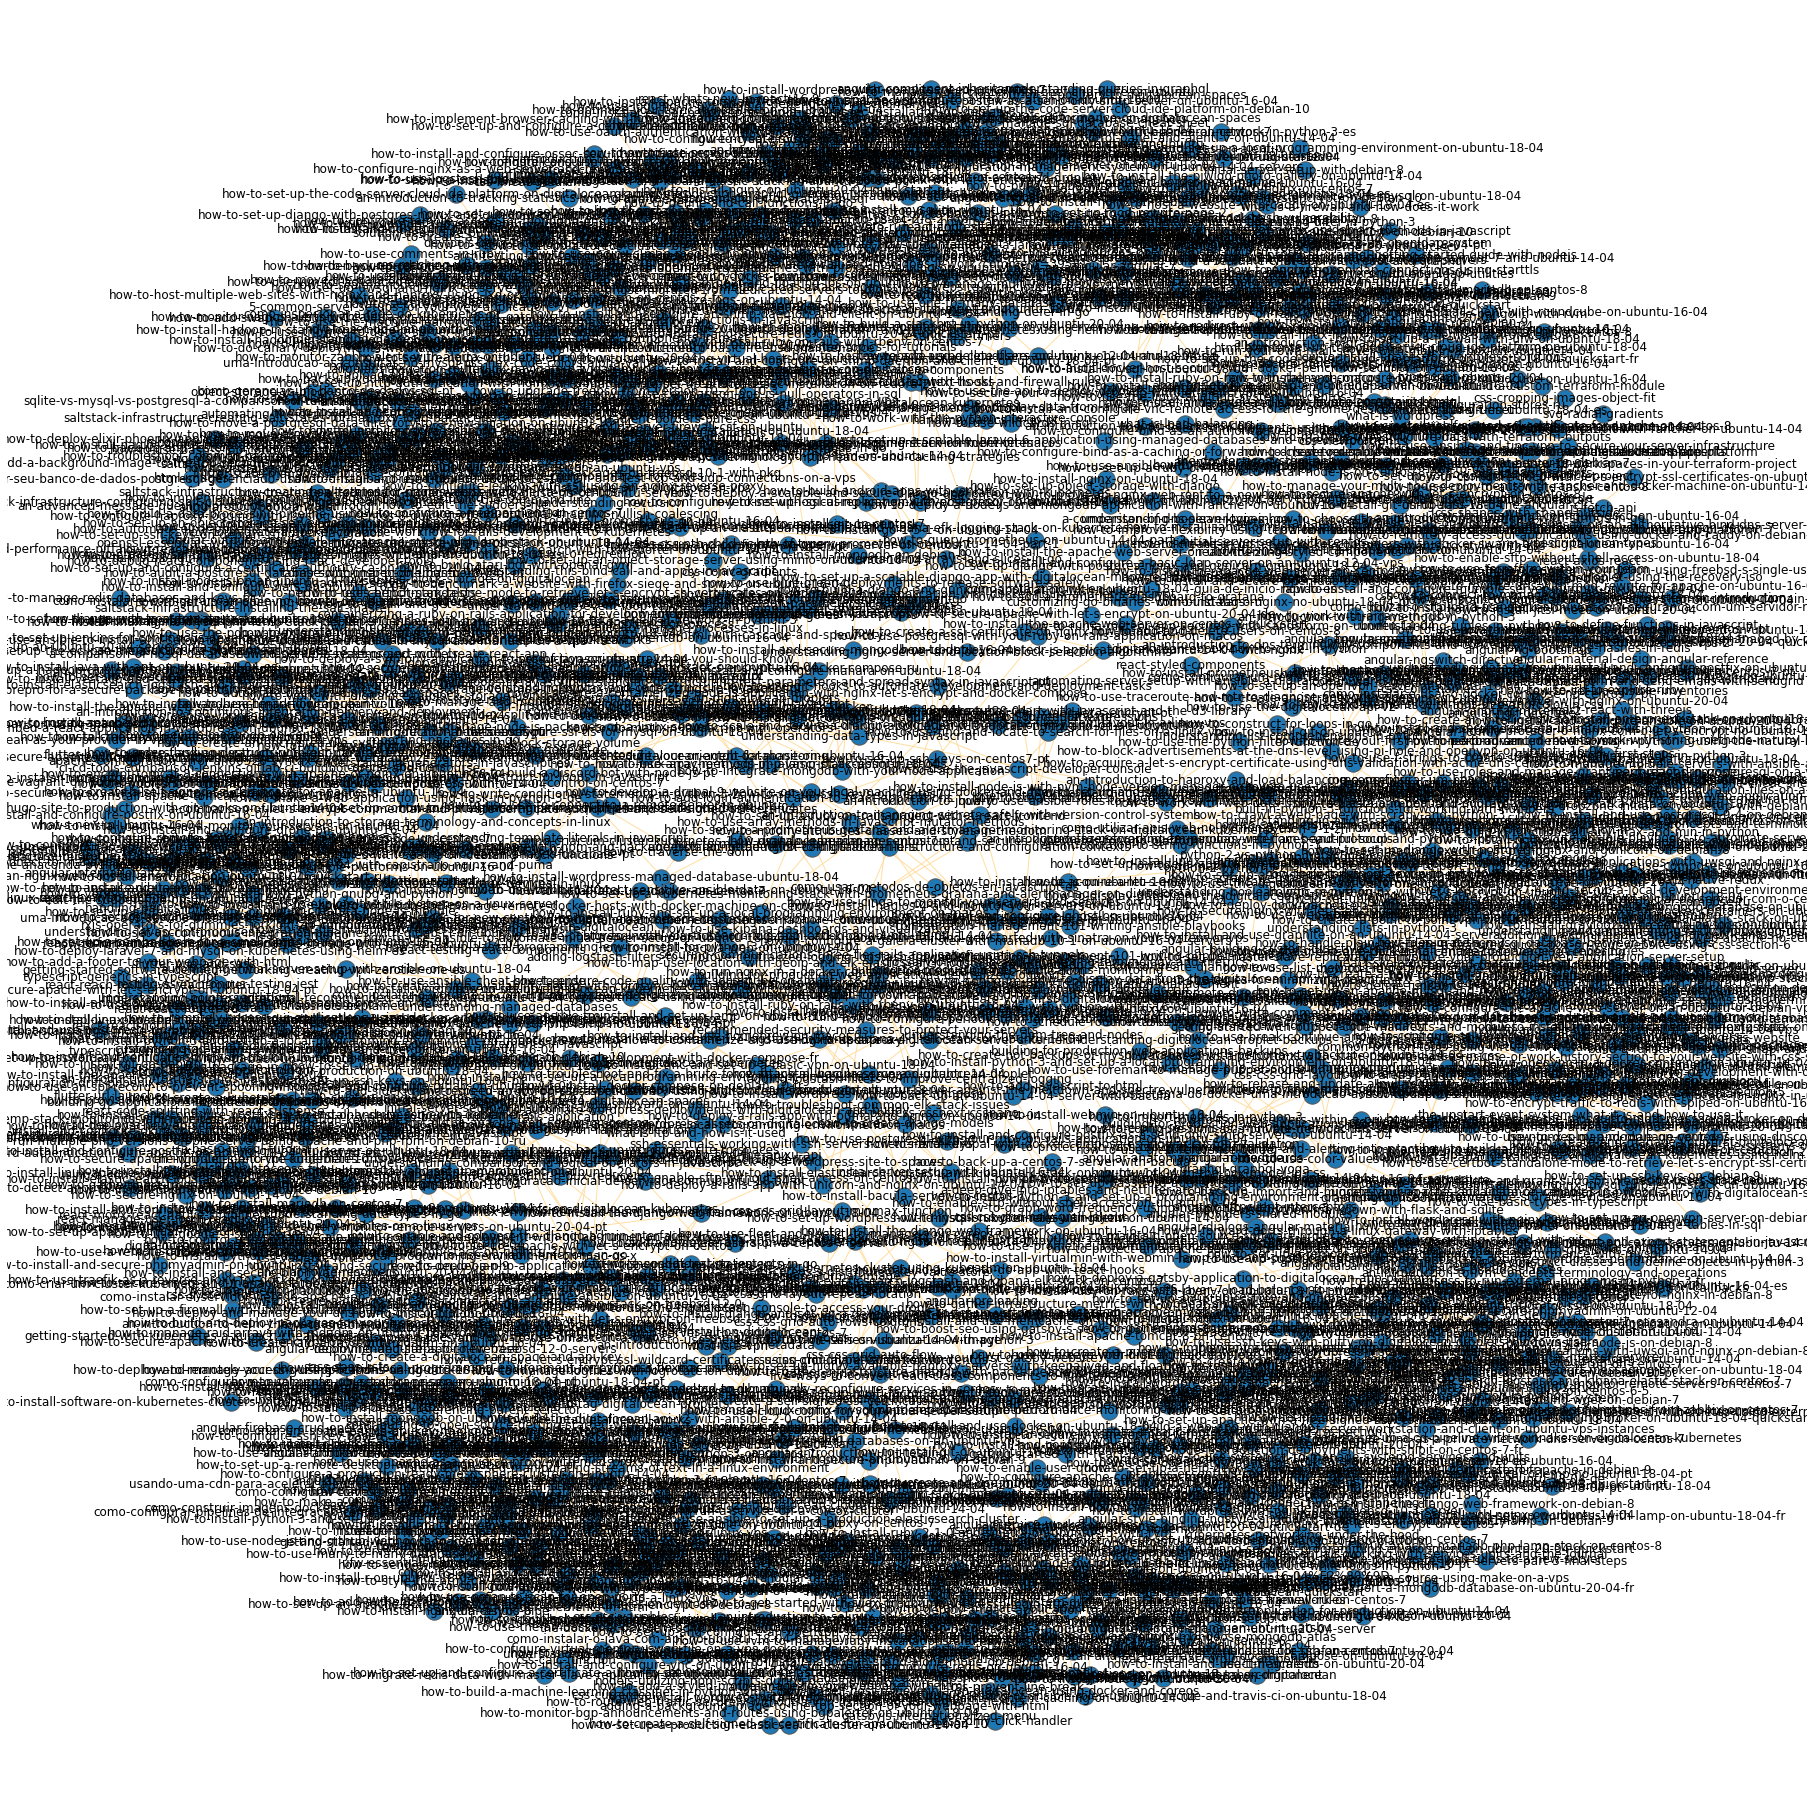

In [26]:
G = nx.Graph()
for index, row in df_nodes.iterrows():
    G.add_node(row['slug'], group=row['group'], nodesize=row['nodesize_link_to_trans'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['slug'], row['url'], row['value'])])
    
## This is a redundant step given that we don't have groups
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}


nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

In [145]:
## Trying to create a similar graph with different nodesize

G = nx.Graph()
for index, row in df_nodes.iterrows():
    G.add_node(row['slug'], group=row['group'], nodesize=row['nodesize_link_to_trans'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['slug'], row['url'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

## Can't figure out what happened to nodesize
sizes = [G.nodes[node]['nodesize']*10 for node in G]

nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

KeyError: 'nodesize'

<Figure size 1800x1800 with 0 Axes>

### Change library to `pyvis` because couldn't figure out how to show nodesize using nx.Graph()

** References:

https://pyvis.readthedocs.io/en/latest/tutorial.html

https://github.com/WestHealth/pyvis/blob/master/README.md

In [43]:
pip install pyvis

Note: you may need to restart the kernel to use updated packages.Collecting jsonpickle>=1.4.1



In [126]:
dict_of_df_nodes = df_nodes.to_dict()
type(dict_of_df_nodes['nodesize_link_to_trans'][0])

int

In [181]:
from pyvis.network import Network

g = Network()
size = dict_of_df_nodes['nodesize_link_to_trans']
g.add_nodes(df_nodes['slug'], value = size)

g.show_buttons()
g.show("basic.html")

The basic.html graph showed each tutorial with the nodesize represent how many links 'inside' a tutoral.

** Haven't figure out how to add edges into this graph

## Combined # links inside a tutorial and # links to a tutorial to do the visualization

In [139]:
df_nodes_combined = pd.read_csv("Desktop/Hsin/Data_Analysis/Raw_Data/Tutorial/Network/network_nodes_link_combined_square.csv")
df_nodes_combined = df_nodes_combined.rename(columns={"Unnamed: 3": "total_links"})
df_nodes_combined.head()

slug  group  total_score  \
0               3-strategies-for-minimizing-downtime      1          610   
1  3-ways-to-securely-browse-the-internet-with-op...      1          310   
2     4-uses-of-javascripts-arraymap-you-should-know      1          110   
3    5-common-server-setups-for-your-web-application      1          210   
4             5-digitalocean-load-balancer-use-cases      1          610   

   total_links  total_score_square  
0            6                  36  
1            3                   9  
2            1                   1  
3            2                   4  
4            6                  36

Data transformation: 1) total_score = total_links * 100 + 10; 2) total_score_square = total_links ^ 2

In [134]:
dict_of_df_nodes_combined = df_nodes_combined.to_dict()
type(dict_of_df_nodes_combined['total_score'][0])
dict_of_df_nodes_combined['total_score'][0]

610

In [206]:
df_edges_drop = df_edges.drop(index=1470)

g_combined = Network(height='750px', width='100%', bgcolor='#222222', font_color='white', notebook=True)
g_combined.add_nodes(df_nodes_combined['slug'], value = dict_of_df_nodes_combined['total_score'])

slug = df_edges_drop['slug']
url = df_edges_drop['url']
weights = df_edges_drop['value']

edge_data = zip(slug, url, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    g_combined.add_edge(src, dst, value=w)

g_combined.set_options("""var options = {
  "edges": {
    "color": {
      "inherit": true
    },
    "smooth": false
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -12000,
      "centralGravity": 0.1,
      "springLength": 75
    },
    "minVelocity": 0.75
  }
}""")
g_combined.show("basic_comb.html")

## Try to group nodes and edges together

In [186]:
import networkx as nx
df_nodes_combined_group = pd.read_csv("Desktop/Hsin/Data_Analysis/Raw_Data/Tutorial/Network/network_nodes_link_combined_group.csv")
df_nodes_combined_group.head()

slug  group  total_score  \
0                    digitalocean-community-glossary      1         3010   
1  how-to-migrate-a-docker-compose-workflow-to-ku...      1         1910   
2  how-to-speed-up-wordpress-asset-delivery-using...      1         1910   
3  how-to-set-up-a-scalable-django-app-with-digit...      1         1810   
4        digitalocean-s-technical-writing-guidelines      1         1710   

   total_links  total_score_square  group.1  
0           30                 900        1  
1           19                 361        1  
2           19                 361        1  
3           18                 324        1  
4           17                 289        1

In [184]:
dict_of_df_nodes_combined_group = df_nodes_combined_group.to_dict()
type(dict_of_df_nodes_combined_group['total_score'][0])
dict_of_df_nodes_combined_group['total_score'][0]

3010

In [196]:
g_combined_group = nx.cycle_graph(2154)

for index, row in df_nodes_combined_group.iterrows():
    g_combined_group.add_node(row['slug'], group=row['group.1'], nodesize=row['total_score_square'])
for index, row in df_edges_drop.iterrows():
    g_combined_group.add_weighted_edges_from([(row['slug'], row['url'], row['value'])])

nt = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
# populates the nodes and edges data structures
nt.from_nx(g_combined_group)
nt.show('nx.html')

## Try using different color

In [198]:
df_nodes_combined_group_color = pd.read_csv("Desktop/Hsin/Data_Analysis/Raw_Data/Tutorial/Network/network_nodes_link_combined_group_color_code.csv")
df_nodes_combined_group_color.head()

slug  group  total_score  \
0                    digitalocean-community-glossary      1         3010   
1  how-to-migrate-a-docker-compose-workflow-to-ku...      1         1910   
2  how-to-speed-up-wordpress-asset-delivery-using...      1         1910   
3  how-to-set-up-a-scalable-django-app-with-digit...      1         1810   
4        digitalocean-s-technical-writing-guidelines      1         1710   

   total_links  total_score_square  group_1    color  
0           30                 900        1  #F5F218  
1           19                 361        1  #F5F218  
2           19                 361        1  #F5F218  
3           18                 324        1  #F5F218  
4           17                 289        1  #F5F218

In [199]:
dict_of_df_nodes_combined_group_color = df_nodes_combined_group_color.to_dict()
type(dict_of_df_nodes_combined_group_color['total_score'][0])
dict_of_df_nodes_combined_group_color['total_score'][0]

3010

In [203]:
g_combined_color = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
g_combined_color.add_nodes(df_nodes_combined_group_color['slug'], value = dict_of_df_nodes_combined_group_color['total_score_square'], color=df_nodes_combined_group_color['color'])

slug = df_edges_drop['slug']
url = df_edges_drop['url']
weights = df_edges_drop['value']

edge_data = zip(slug, url, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    g_combined_color.add_edge(src, dst, value=w)

g_combined_color.show_buttons()
g_combined_color.show("basic_comb_color.html")